In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [3]:
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from src.problem import get_model

# New Instances

In [4]:
instances_fps = list(Path('../data/raw/').glob('*.json'))

instance_fp = instances_fps[0]

with open(instance_fp) as f:
    instance = json.load(f)
instance.keys()

dict_keys(['subs', 'jobs', 'T', 'power_use', 'power_resource', 'min_cpu_time', 'max_cpu_time', 'min_job_period', 'max_job_period', 'min_startup', 'max_startup', 'priority', 'win_min', 'win_max'])

In [5]:
instance['win_max']

[120, 98, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]

: 

In [22]:
instance['T_size']

120

In [32]:
model = get_model(instance, new_ineq=True)
{var.varname.split('(')[0] for var in model.getVars()}

{'phi', 'x'}

In [35]:
i = 2
j = 25
model.getVarByName(f"x({i},{j})")

<gurobi.Var x(2,25)>

# Solutions

In [4]:
with open('../data/interim/solutions.pkl', 'rb') as f:
    solutions = pickle.load(f)

solutions.keys()

dict_keys(['120_13_33', '125_13_87', '125_9_48', '120_13_64', '120_13_81', '125_9_95', '125_18_70', '125_9_57', '125_9_96', '125_9_26', '125_9_28', '120_9_40', '125_13_22', '120_18_43', '120_13_87', '125_18_93', '120_18_89', '125_18_23', '120_18_9', '120_9_77', '125_18_71', '125_9_13', '120_13_60', '120_9_76', '125_18_16', '125_13_75', '125_18_76', '120_18_69', '125_9_90', '120_18_92', '125_13_55', '120_18_8', '125_13_73', '120_18_64', '125_9_11', '120_9_95', '125_18_0', '125_18_39', '125_9_87', '120_13_24', '125_18_67', '125_9_14', '120_18_67', '125_18_37', '125_9_36', '120_18_38', '125_9_39', '120_13_2', '125_13_77', '120_18_48', '120_13_4', '125_9_6', '125_9_86', '125_18_94', '120_9_51', '125_13_2', '120_13_22', '125_13_38', '125_18_27', '125_18_46', '125_13_7', '120_18_49', '125_9_45', '120_13_70', '125_9_76', '125_13_68', '125_18_43', '120_18_30', '125_18_62', '125_18_58', '120_13_48', '125_18_54', '120_9_24', '120_18_96', '125_9_7', '120_18_90', '120_18_66', '125_13_64', '120_9_5

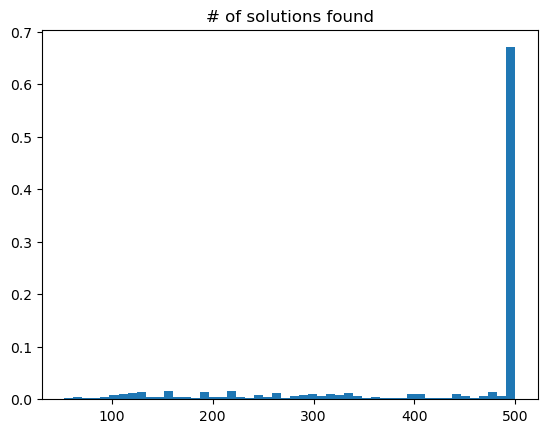

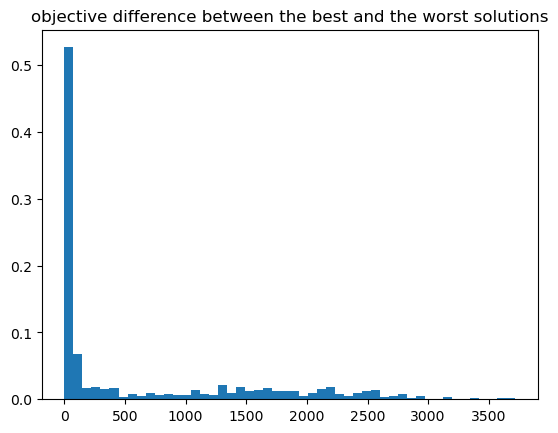

In [64]:
n_sols = list()
objs_range = list()
for sol in solutions.values():
    n_sols.append(len(sol['objs']))
    objs_range.append(max(sol['objs']) - min(sol['objs']))

plt.hist(n_sols, bins=50, weights=[1/len(n_sols),] * len(n_sols), log=False)
plt.title('# of solutions found')
plt.show()

plt.hist(objs_range, bins=50, weights=[1/len(n_sols),] * len(n_sols), log=False)
plt.title('objective difference between the best and the worst solutions')
plt.show()

# Test instances

In [187]:
def flatten(l):
    if not isinstance(l, list):
        return l

    l_ = list()
    for l_i in l:
        if isinstance(l_i, list):
            l_i = flatten(l_i)
        else:
            l_i = [l_i, ]

        l_ += l_i  # concatenate

    return l_

In [232]:
with open('../data/raw/test_instances/290_9.json') as f:
    instance = json.load(f)

instance['min_cpu_time']

[[218], [24], [3], [8], [15], [2], [3], [10], [3]]

In [ ]:
instance['min_periodo_job']

[[10], [37], [15], [19], [19], [18], [10], [15], [37]]

In [278]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

# instances_values['win_min'] = [max(min_s) for min_s in instances_values['win_min']]
# instances_values['win_max'] = [min(max_s) for max_s in instances_values['win_max']]
# instances_values['min_cpu_time'] = [max(min_s) for min_s in instances_values['min_cpu_time']]
# instances_values['max_cpu_time'] = [max(max_s) for max_s in instances_values['max_cpu_time']]
# instances_values['min_periodo_job'] = [max(min_s) for min_s in instances_values['min_periodo_job']]
# instances_values['max_periodo_job'] = [max(max_s) for max_s in instances_values['max_periodo_job']]
# instances_values['min_startup'] = [max(min_s) for min_s in instances_values['min_startup']]
# instances_values['max_startup'] = [max(max_s) for max_s in instances_values['max_startup']]

instances_values.pop('recurso_p')
instances_values.pop('priority')
instances_values.pop('uso_p')

flat_instances_values = {k: list() for k in instances_values.keys()}
for i in range(len(test_instances)):
    for j in range(instances_values['jobs'][i]):
        for k in ['min_startup', 'max_startup', 'min_periodo_job', 'max_periodo_job', 'win_min', 'win_max', 'min_cpu_time', 'max_cpu_time']:
            flat_instances_values[k].append(instances_values[k][i][j])
        
        flat_instances_values['jobs'].append(instances_values['jobs'][i])
        flat_instances_values['T'].append(instances_values['T'][i])

df = pd.DataFrame(flat_instances_values)
df

,T,min_startup,max_periodo_job,win_min,jobs,min_cpu_time,max_startup,max_cpu_time,min_periodo_job,win_max
0,291,3,205,0,22,7,10,9,70,291
1,291,2,75,0,22,22,4,61,45,291
2,291,7,98,0,22,16,20,49,39,291
3,291,5,126,0,22,29,14,39,66,291
4,291,4,126,0,22,10,19,50,56,291
...,...,...,...,...,...,...,...,...,...,...
737,170,2,64,0,22,16,10,16,23,170
738,170,3,122,0,22,15,7,20,42,170
739,170,3,155,0,22,2,3,40,5,170
740,170,1,94,0,22,13,3,20,28,170


win_max


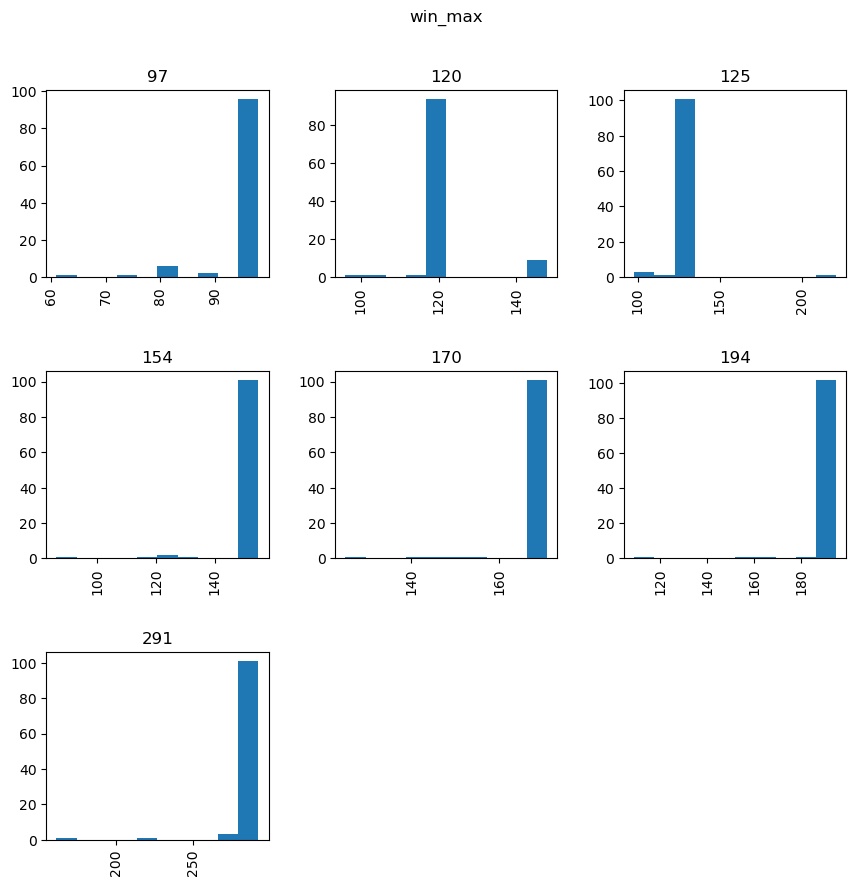

T
97      97.0
120    120.0
125    125.0
154    154.0
170    170.0
194    194.0
291    291.0
Name: win_max, dtype: float64
1.0
0.0


In [303]:
k = 'win_max'
print(k)
df.hist(column=k, by='T', figsize=(10,10))
plt.suptitle(k)
plt.show()

s = df.groupby('T')[k].quantile(.1)
print(s)
print(max(s.values / s.index))
print(min(s.index - s.values))

0.12987012987012986
90.0


In [242]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    # if instance['jobs'] < 20:
    #     continue

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

min_cpu_times = [np.array(m) for m in instances_values['min_cpu_time']]
min_periodo_job = [np.array(m) for m in instances_values['min_periodo_job']]

for i in range(len(min_cpu_times)):
    mct = min_cpu_times[i]
    mpj = min_periodo_job[i]

    if any((mpj - mct) < 0):
        print(test_instances[i])

../data/raw/test_instances/120_9.json
../data/raw/test_instances/290_9.json
../data/raw/test_instances/154_9.json
../data/raw/test_instances/194_9.json


In [247]:
with open('../data/raw/test_instances/194_9.json') as f:
    instance = json.load(f)

instance['min_cpu_time']

[[145], [16], [2], [5], [10], [1], [2], [7], [2]]

In [248]:
instance['min_periodo_job']

[[7], [25], [10], [13], [13], [12], [7], [10], [25]]

In [241]:
mct - mpj

array([-24,  -3, -31, -25, -15, -31, -15, -19,  -3,  -4, -21, -17, -13,
       -29,  -4, -28, -18,  -7, -27,  -3, -15,  -7])

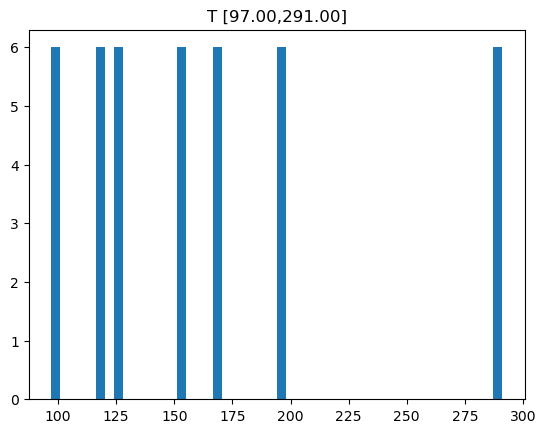

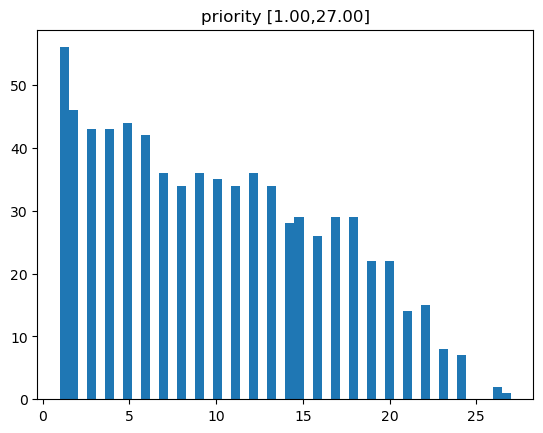

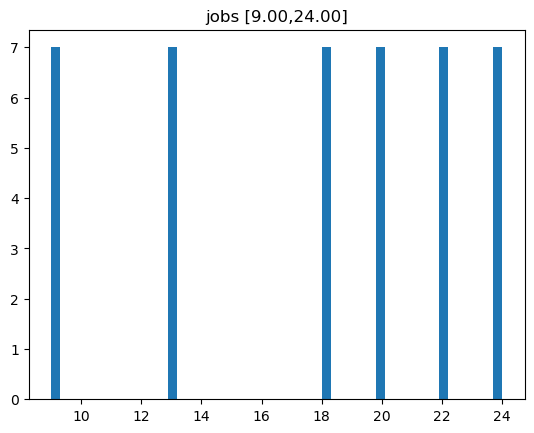

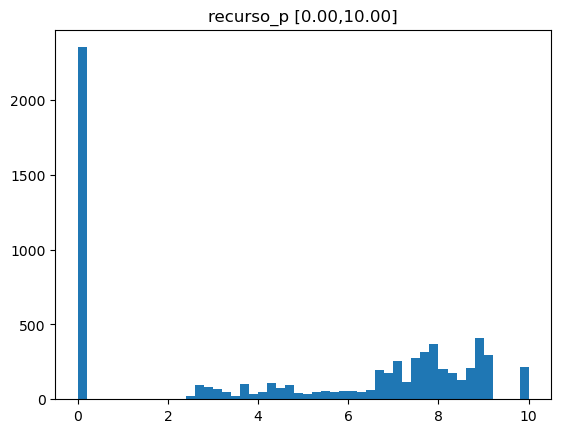

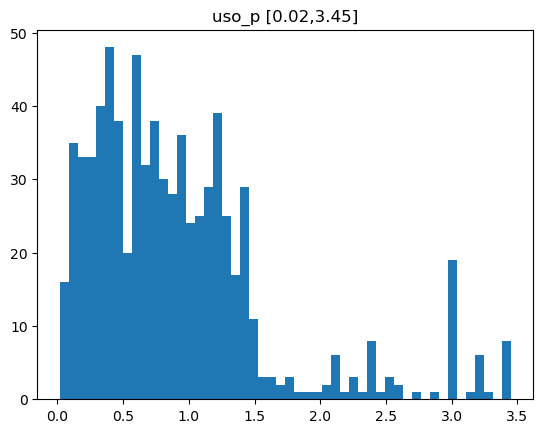

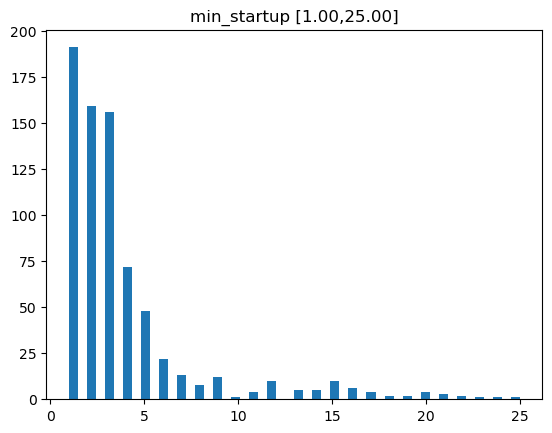

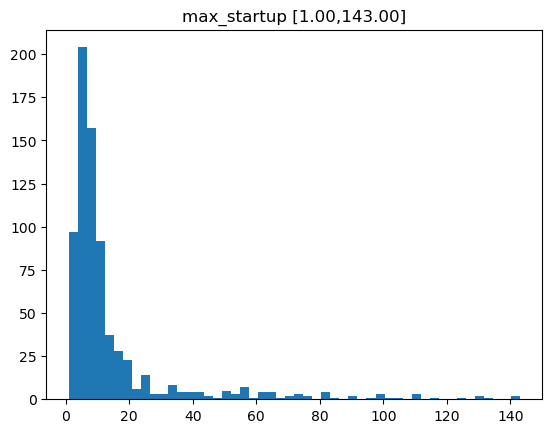

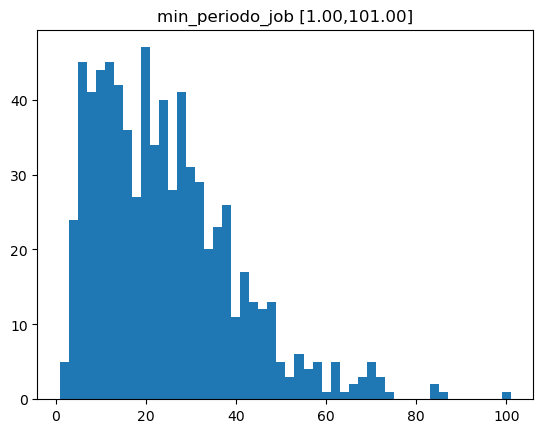

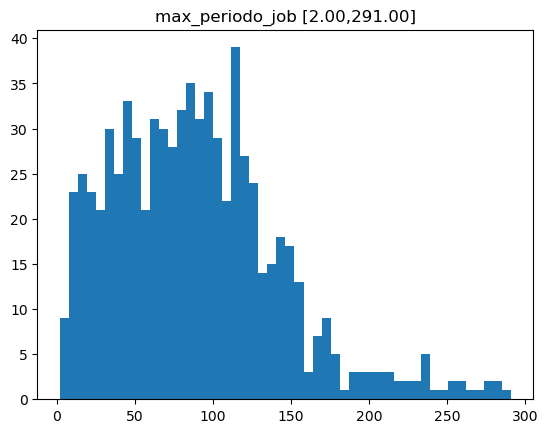

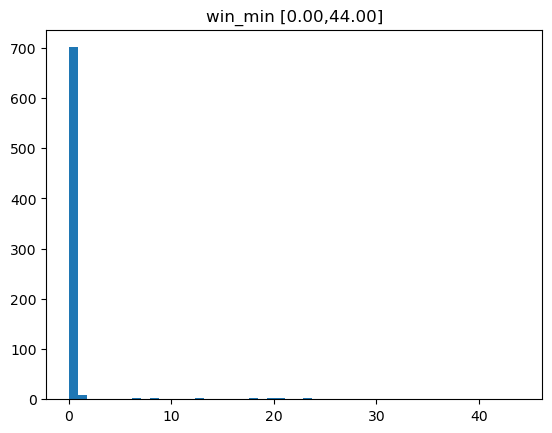

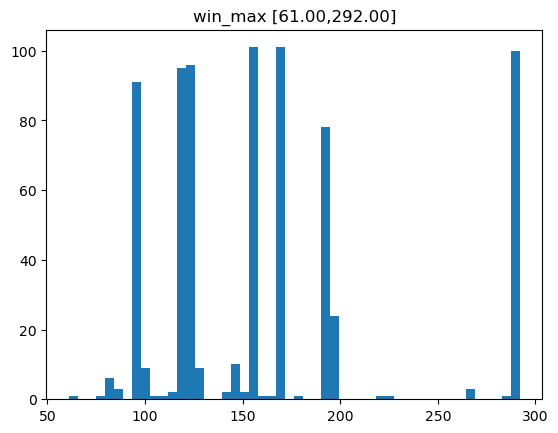

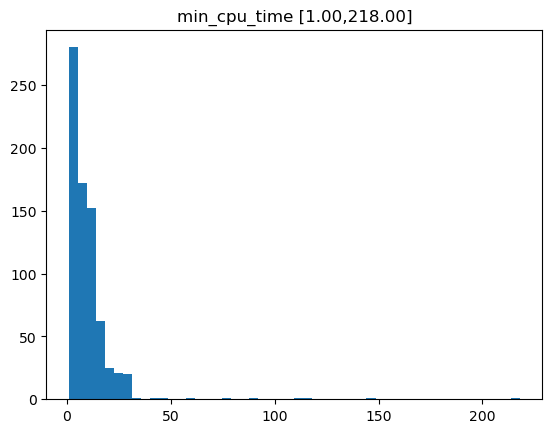

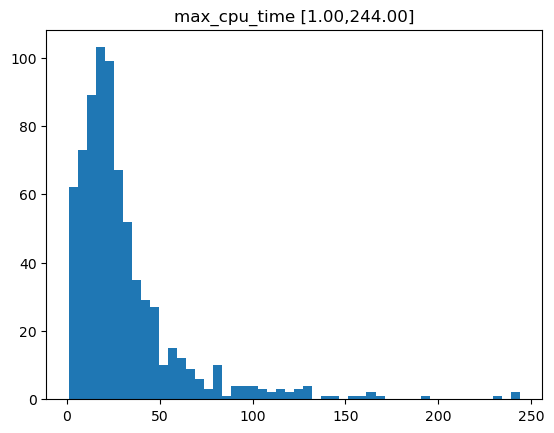

In [195]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    # if instance['jobs'] < 20:
    #     continue

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

keys = [
    'T',
    'priority',
    'jobs',
    'recurso_p',
    'uso_p',
    'min_startup',
    'max_startup',
    'min_periodo_job',
    'max_periodo_job',
    'win_min',
    'win_max',
    'min_cpu_time',
    'max_cpu_time',
]
for k in keys:
    v = instances_values[k]
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

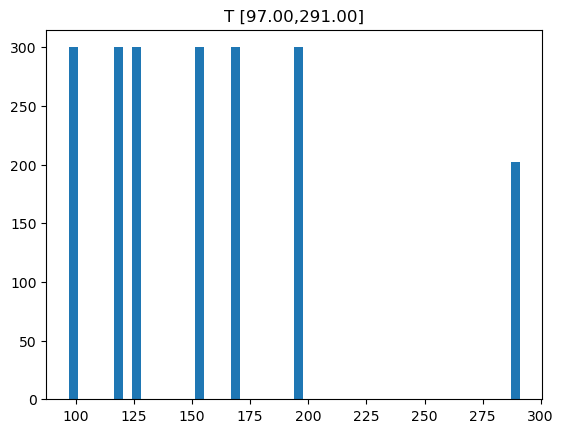

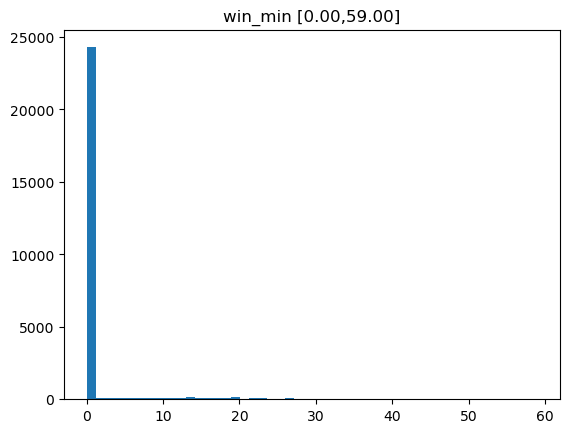

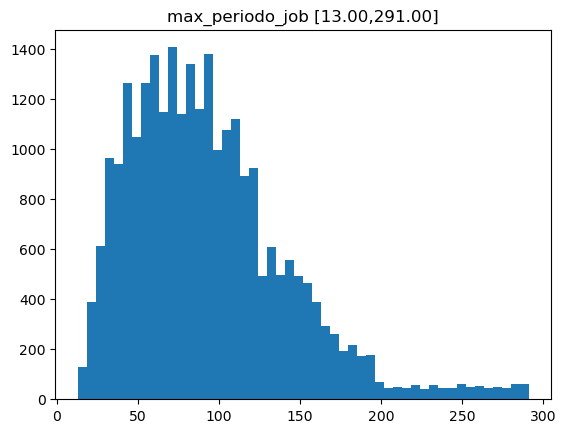

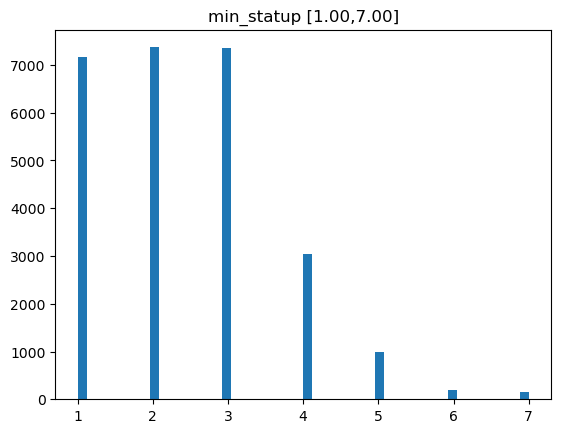

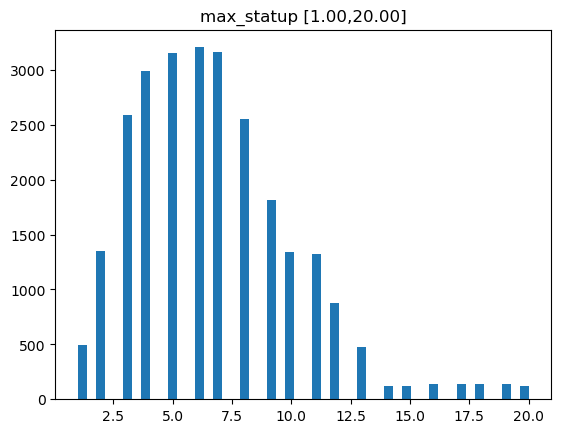

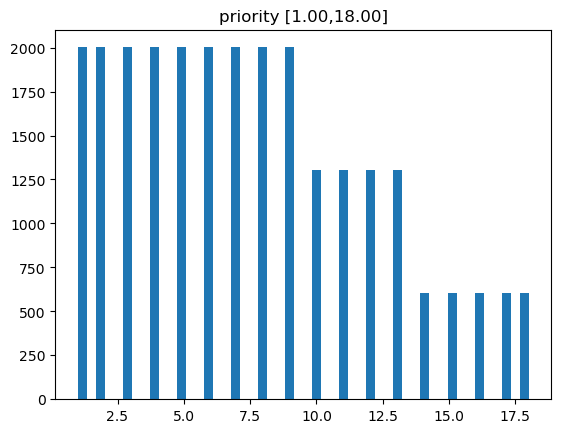

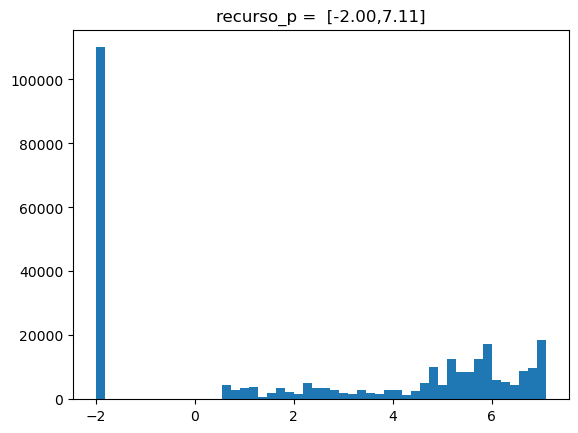

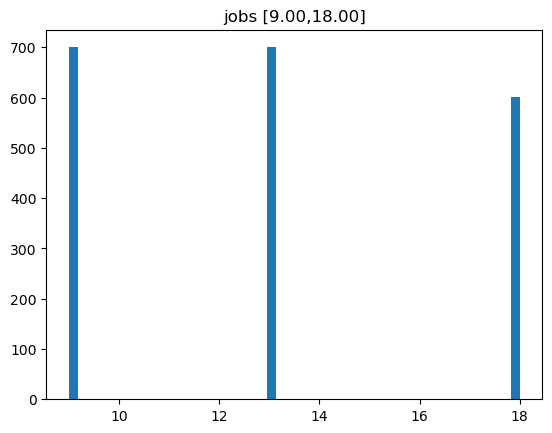

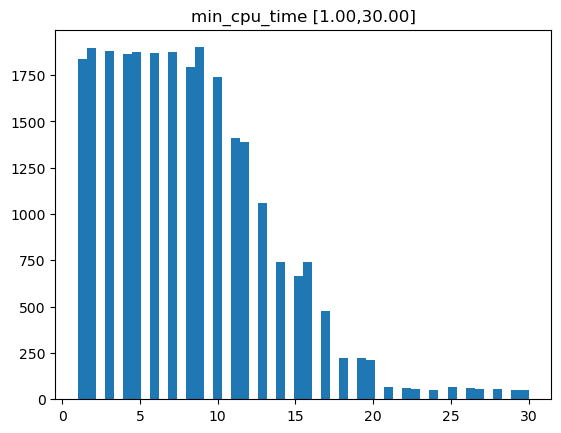

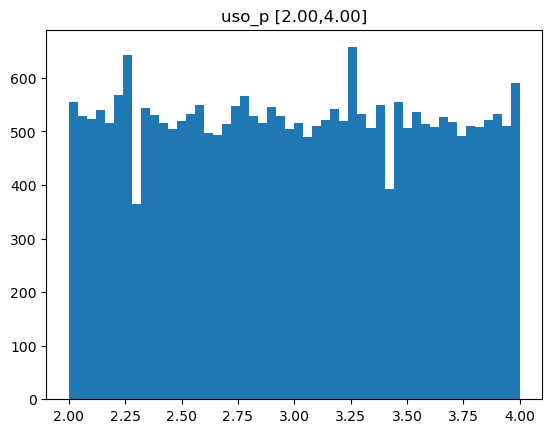

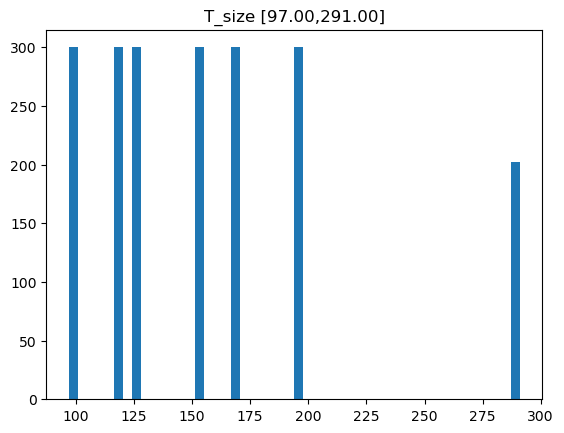

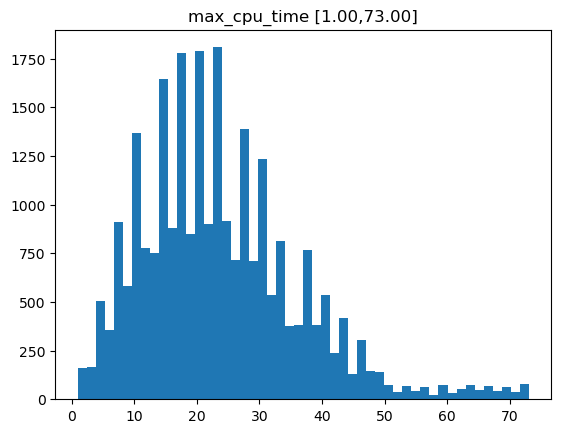

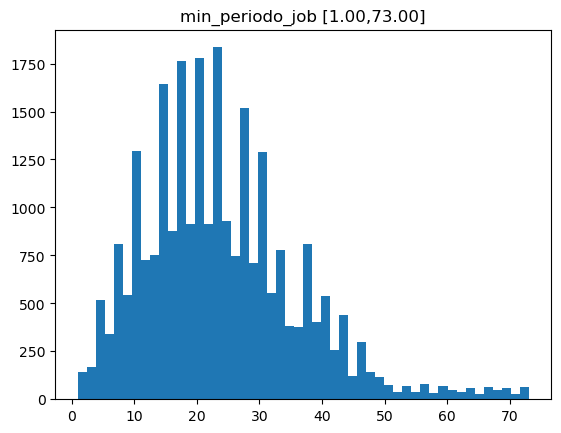

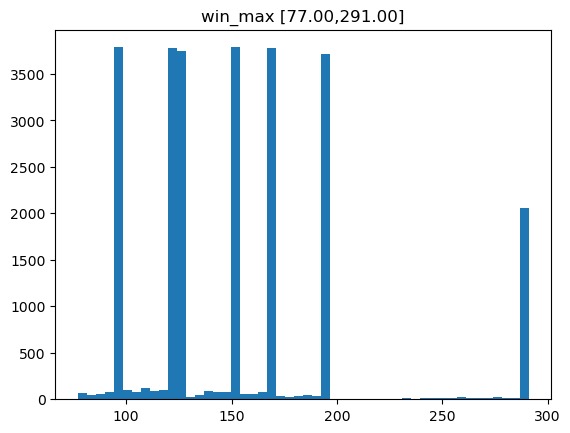

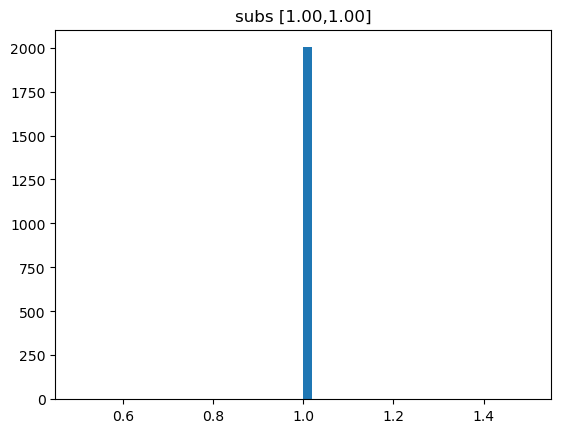

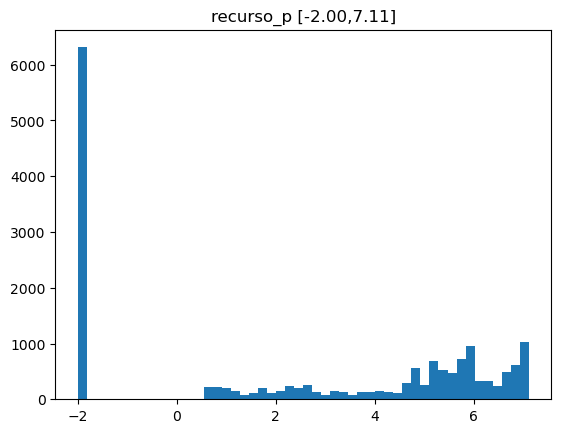

In [190]:
instances_values = dict()
for instance_fp in Path('../data/raw/').glob('*.json'):
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

for k, v in instances_values.items():
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

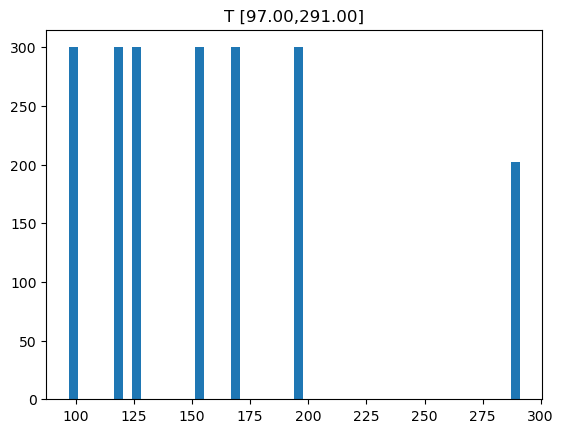

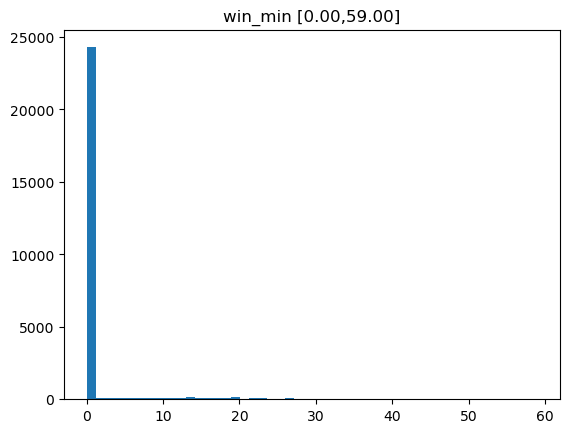

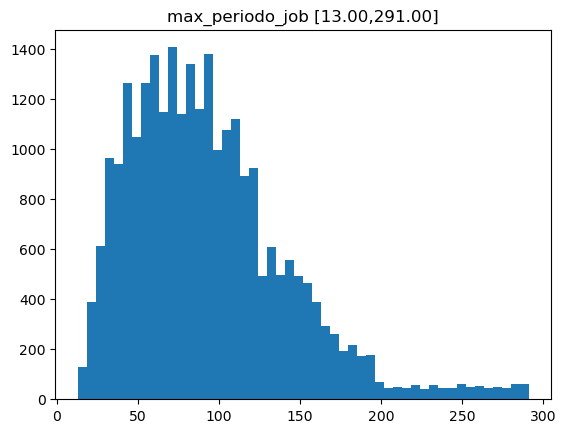

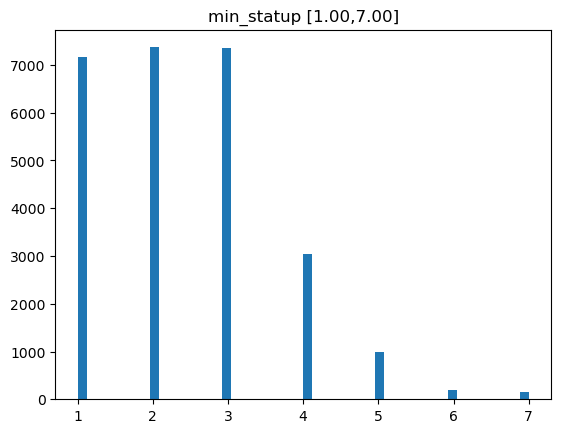

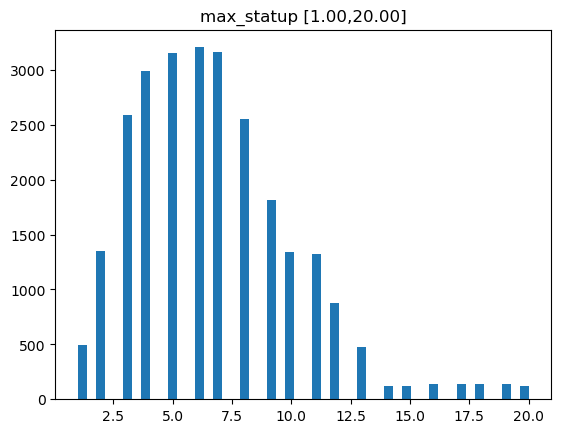

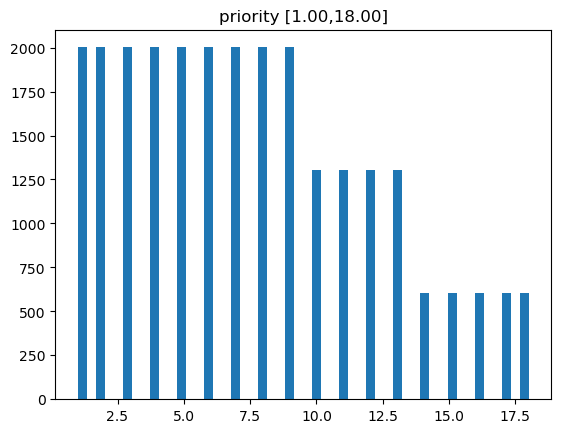

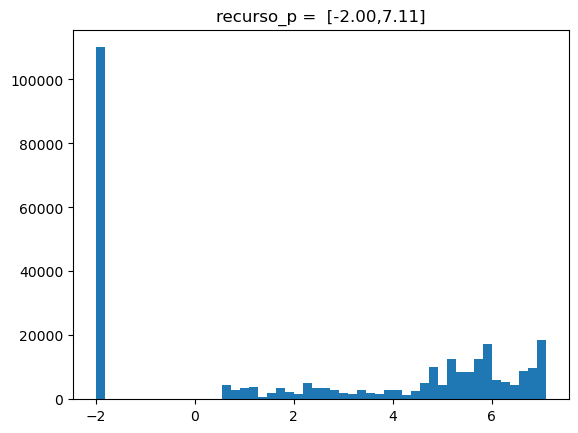

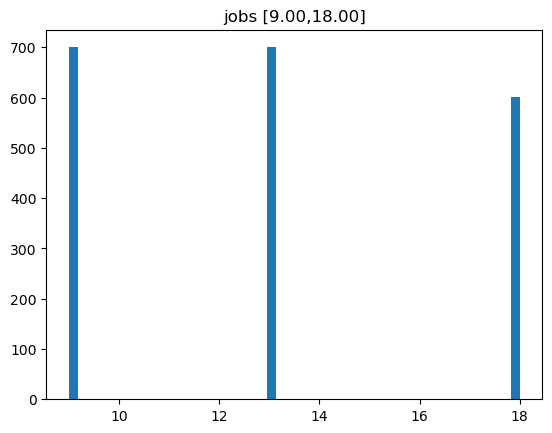

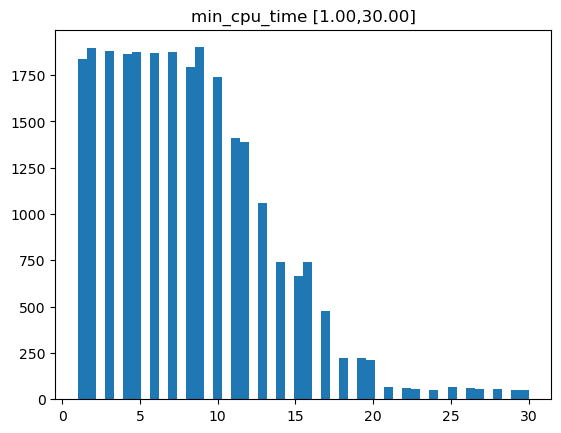

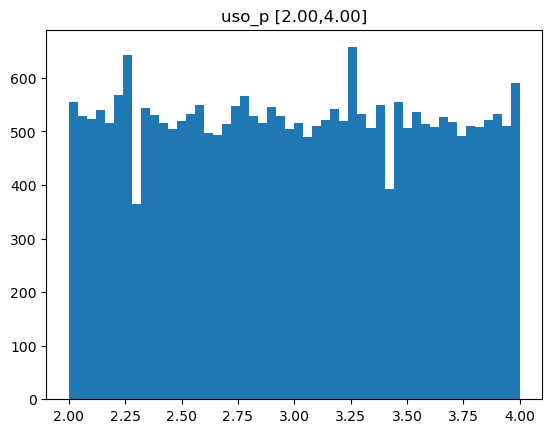

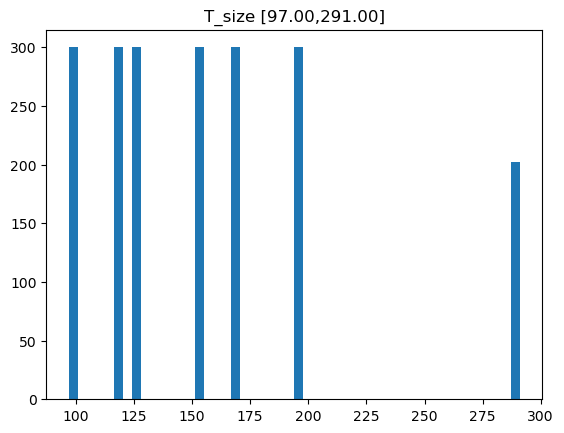

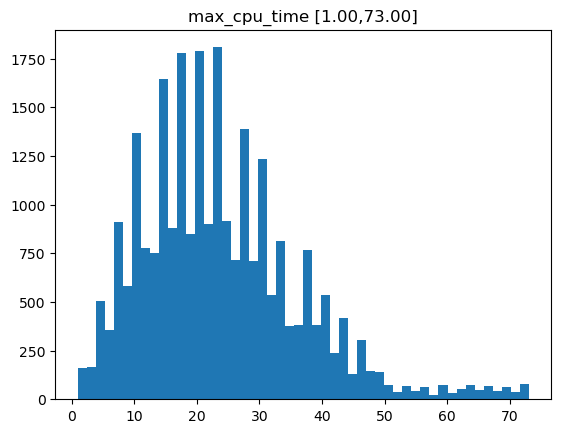

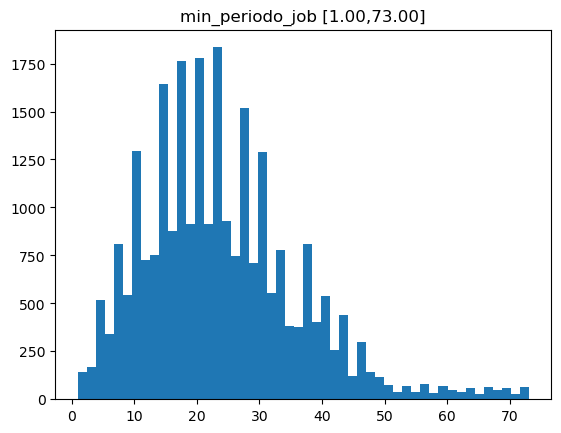

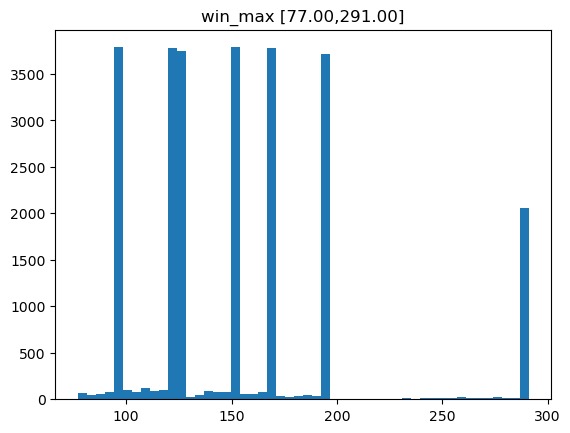

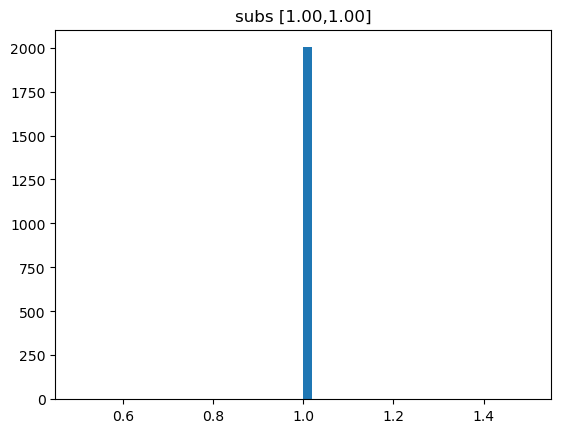

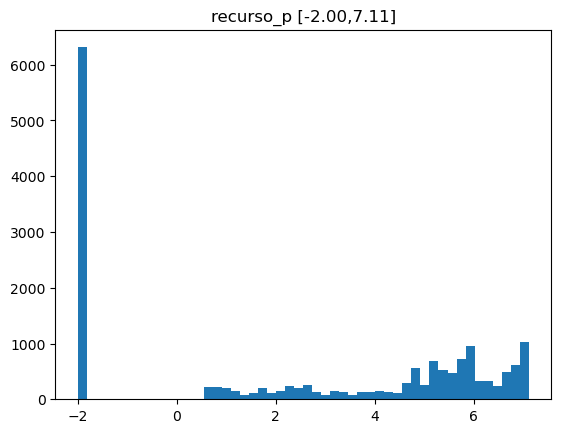

In [145]:
instances_values = dict()
for instance_fp in Path('../data/raw/').glob('*.json'):
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

for k, v in instances_values.items():
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

# Generated Instances

In [6]:
ns = dict()
for t in [97, 120, 125, 154, 170, 194, 291]:
    for j in [9, 13, 18, 20, 22, 24]:
        ns[t,j] = len(list(Path('../data/raw/').glob('%d_%d_*.json' % (t, j))))
ns

{(97, 9): 109,
 (97, 13): 50,
 (97, 18): 104,
 (97, 20): 107,
 (97, 22): 103,
 (97, 24): 105,
 (120, 9): 106,
 (120, 13): 52,
 (120, 18): 104,
 (120, 20): 100,
 (120, 22): 100,
 (120, 24): 26,
 (125, 9): 102,
 (125, 13): 50,
 (125, 18): 0,
 (125, 20): 0,
 (125, 22): 0,
 (125, 24): 0,
 (154, 9): 100,
 (154, 13): 0,
 (154, 18): 0,
 (154, 20): 0,
 (154, 22): 0,
 (154, 24): 0,
 (170, 9): 56,
 (170, 13): 0,
 (170, 18): 0,
 (170, 20): 0,
 (170, 22): 0,
 (170, 24): 0,
 (194, 9): 100,
 (194, 13): 0,
 (194, 18): 0,
 (194, 20): 0,
 (194, 22): 0,
 (194, 24): 0,
 (291, 9): 0,
 (291, 13): 0,
 (291, 18): 0,
 (291, 20): 0,
 (291, 22): 0,
 (291, 24): 0}